<a href="https://colab.research.google.com/github/Aditya8215/RedBus-Hackathon_project/blob/main/RedBus_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your goal:

Predict the demand (total number of seats booked) for each journey at the route level, 15 days before the actual date of journey (doj).
Example: For a route from Source City "A" to Destination City "B" with a date of journey (doj) on 30-Jan-2025, you need to predict the final seat count for this route on 16-Jan-2025, which is exactly 15 days prior to the journey date.

Evaluation Metric:


The evaluation metric for this hackathon would be RMSE (Root Mean Squared Error).

#Data dictionary
The following table provides a comprehensive data dictionary, outlining the structure and description of each variable used in the given dataset.


#1. train.csv

Variable

Description

doj (Date of Journey)

The date on which the bus journey is scheduled to take place.

srcid (Source City ID)

Unique identifier for the source city of the journey.

destid (Destination City ID)

Unique identifier for the destination city of the journey.

final_seatcount

Total number of seats booked at the end of the journey date (Target Variable).

#2. test.csv

Variable

Description

route_key

Unique identifier for each row in the test set.

doj (Date of Journey)

The date on which the bus journey is scheduled to take place.

srcid (Source City ID)

Unique identifier for the source city of the journey.

destid (Destination City ID)

Unique identifier for the destination city of the journey.


#3. transactions.csv

Variable

Description

doj (Date of Journey)

The date on which the bus journey is scheduled to take place.

doi (Date of Issue)

The date when the ticket was booked.

dbd (Days Before Departure)

The number of days remaining until the journey date from the date of issue, for a given srcid, destid, doi and doj combination.

srcid (Source City ID)

Unique identifier for the source city of the journey.

destid (Destination City ID)

Unique identifier for the destination city of the journey.

srcid_region

The region (state) where the source city is located.

destid_region

The region (state) where the destination city is located.

srcid_tier

The tier classification of the source city (e.g., Tier 1, Tier 2).

destid_tier

The tier classification of the destination city (e.g., Tier 1, Tier 2).

cumsum_seatcount

This represents the cumulative number of seats sold till date.

cumsum_searchcount

This will represent the cumulative number of searches till date.

#4. submission_file.csv

Variable

Description

route_key

Unique identifier for each row in the test set.

final_seatcount

Total number of seats booked at the end of the journey date (Target Variable).



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
train=pd.read_csv("/content/train.csv")
df=pd.read_csv("/content/transactions.csv")
train.head()

,doj,srcid,destid,final_seatcount
0,2023-03-01,45,46,2838.0
1,2023-03-01,46,45,2298.0
2,2023-03-01,45,47,2720.0
3,2023-03-01,47,45,2580.0
4,2023-03-01,46,9,4185.0


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67200 entries, 0 to 67199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doj              67200 non-null  object 
 1   srcid            67200 non-null  int64  
 2   destid           67200 non-null  int64  
 3   final_seatcount  67200 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ MB


In [107]:
df.sample(50)

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
859659,2023-12-03,2023-11-12,30,14,Maharashtra and Goa,Maharashtra and Goa,1,2,0.0,400.0,21
876200,2023-12-08,2023-11-28,45,46,Karnataka,Tamil Nadu,1,1,176.0,5414.0,10
380872,2023-07-01,2023-06-27,14,30,Maharashtra and Goa,Maharashtra and Goa,2,1,190.0,1920.0,4
24836,2023-03-09,2023-02-07,45,42,Karnataka,Karnataka,1,2,0.0,52.0,30
1211144,2024-03-25,2024-03-16,47,2,Andhra Pradesh,Maharashtra and Goa,1,1,115.0,3175.0,9
1894974,2024-11-01,2024-10-10,39,45,Tamil Nadu,Karnataka,3,1,28.0,620.0,22
1910614,2024-11-06,2024-10-17,45,28,Karnataka,Andhra Pradesh,1,3,16.0,1088.0,20
308708,2023-06-08,2023-05-27,45,9,Karnataka,Tamil Nadu,1,2,48.0,807.0,12
481212,2023-08-03,2023-07-11,46,44,Tamil Nadu,Tamil Nadu,1,2,0.0,448.0,23
760484,2023-11-01,2023-10-11,22,36,Rest of North,Delhi,2,2,5.0,350.0,21


In [105]:
test=pd.read_csv("/content/test_8gqdJqH.csv")
test.sample(5)

,route_key,doj,srcid,destid
5615,2025-02-05_15_46,2025-02-05,15,46
2803,2025-02-03_25_23,2025-02-03,25,23
5158,2025-01-22_36_11,2025-01-22,36,11
3805,2025-02-21_02_14,2025-02-21,2,14
1505,2025-02-12_28_47,2025-02-12,28,47


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266100 entries, 0 to 2266099
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   doj                 object 
 1   doi                 object 
 2   srcid               int64  
 3   destid              int64  
 4   srcid_region        object 
 5   destid_region       object 
 6   srcid_tier          object 
 7   destid_tier         object 
 8   cumsum_seatcount    float64
 9   cumsum_searchcount  float64
 10  dbd                 int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 190.2+ MB


In [64]:
df.describe()

,srcid,destid,cumsum_seatcount,cumsum_searchcount,dbd
count,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06,2.266100e+06
mean,2.955000e+01,2.975000e+01,1.738379e+02,4.742158e+03,1.500000e+01
std,1.666996e+01,1.593887e+01,4.858925e+02,1.673550e+04,8.944274e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.475000e+01,1.575000e+01,0.000000e+00,2.080000e+02,7.000000e+00
50%,3.600000e+01,3.450000e+01,1.600000e+01,7.640000e+02,1.500000e+01
75%,4.500000e+01,4.500000e+01,1.000000e+02,2.896000e+03,2.300000e+01
max,4.800000e+01,4.800000e+01,1.350300e+04,1.677297e+06,3.000000e+01


In [65]:
df.isnull().sum()

,0
doj,0
doi,0
srcid,0
destid,0
srcid_region,0
destid_region,0
srcid_tier,0
destid_tier,0
cumsum_seatcount,0
cumsum_searchcount,0


In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df.sample(5)

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
1691588,2024-08-27,2024-08-17,33,46,Tamil Nadu,Tamil Nadu,Tier 3,Tier 1,20.0,655.0,10
835422,2023-11-25,2023-11-10,2,30,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier 1,16.0,1996.0,15
1847834,2024-10-17,2024-09-19,18,46,Tamil Nadu,Tamil Nadu,Tier 1,Tier 1,0.0,488.0,28
215217,2023-05-09,2023-04-22,2,40,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier 1,28.0,984.0,17
1675051,2024-08-22,2024-08-02,46,26,Tamil Nadu,Tamil Nadu,Tier 1,Tier 4,10.0,510.0,20


In [68]:
df[df['srcid_region']=='Tamil Nadu']

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30
5,2023-03-01,2023-01-30,9,46,Tamil Nadu,Tamil Nadu,Tier2,Tier 1,0.0,63.0,30
6,2023-03-01,2023-01-30,46,48,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,0.0,309.0,30
7,2023-03-01,2023-01-30,48,46,Tamil Nadu,Tamil Nadu,Tier2,Tier 1,0.0,165.0,30
...,...,...,...,...,...,...,...,...,...,...,...
2266069,2025-02-28,2025-02-28,20,46,Tamil Nadu,Tamil Nadu,Tier2,Tier 1,0.0,0.0,0
2266074,2025-02-28,2025-02-28,39,45,Tamil Nadu,Karnataka,Tier 3,Tier 1,0.0,0.0,0
2266086,2025-02-28,2025-02-28,46,33,Tamil Nadu,Tamil Nadu,Tier 1,Tier 3,0.0,0.0,0
2266088,2025-02-28,2025-02-28,33,46,Tamil Nadu,Tamil Nadu,Tier 3,Tier 1,0.0,0.0,0


# Converting Tier into Numerical value

In [69]:
df['srcid_tier'].value_counts()

,count
srcid_tier,
Tier 1,1336999
Tier2,702491
Tier 3,135966
Tier 4,90644


In [70]:
for i in range(1,5):
  if(i==2):
    df['srcid_tier']=df['srcid_tier'].replace(f"Tier{i}",i)
    df['destid_tier']=df['destid_tier'].replace(f"Tier{i}",i)
  else:
    df['srcid_tier']=df['srcid_tier'].replace(f"Tier {i}",i)
  df['destid_tier']=df['destid_tier'].replace(f"Tier {i}",i)

<ipython-input-70-2992288335>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['srcid_tier']=df['srcid_tier'].replace(f"Tier {i}",i)
<ipython-input-70-2992288335>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['destid_tier']=df['destid_tier'].replace(f"Tier {i}",i)


In [108]:
df["destid"].unique()

array([46, 45, 47,  9, 48,  5, 44, 35, 28, 40, 36, 32, 11, 30,  2, 19, 43,
       23,  7, 12, 18, 42, 25, 15, 34,  3, 16, 26, 27, 13, 31, 14, 37, 20,
       39, 41, 21,  6,  1,  8, 33, 22, 29, 24, 10])

In [72]:
df['srcid_tier'].value_counts()

,count
srcid_tier,
1,1336999
2,702491
3,135966
4,90644


# Data Visualization

In [83]:
values1=df['srcid_region'].value_counts()
values2=df['destid_region'].value_counts()

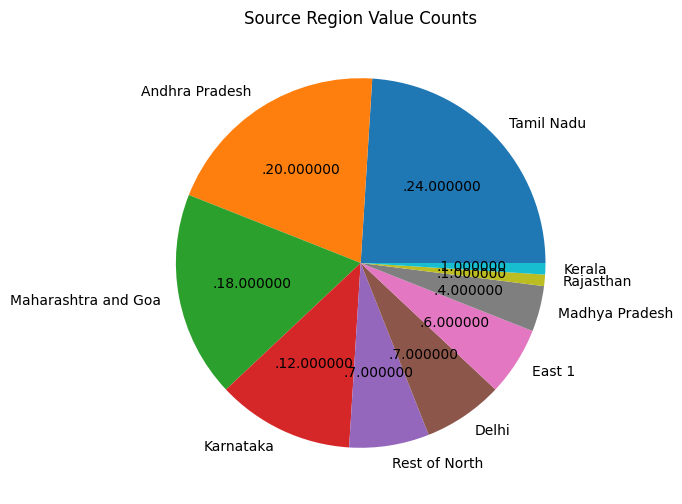

In [85]:
labels=values1.index
plt.figure(figsize=(8,6))
plt.title("Source Region Value Counts")
plt.pie(values1,labels=labels,autopct=".%2f")
plt.show()

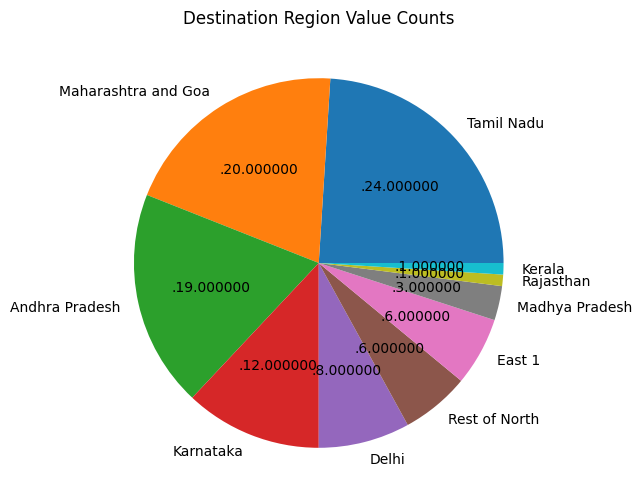

In [90]:
labels2=values2.index
plt.figure(figsize=(8,6))
plt.title("Destination Region Value Counts")
plt.pie(values2,labels=labels2,autopct=".%2f")
plt.show()

#Findding correlation between each city

In [94]:
df['srcid_region'].unique()

array(['Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Maharashtra and Goa',
       'Rest of North', 'Madhya Pradesh', 'Delhi', 'Rajasthan', 'East 1',
       'Kerala'], dtype=object)

<Axes: xlabel='destid_region', ylabel='srcid_region'>

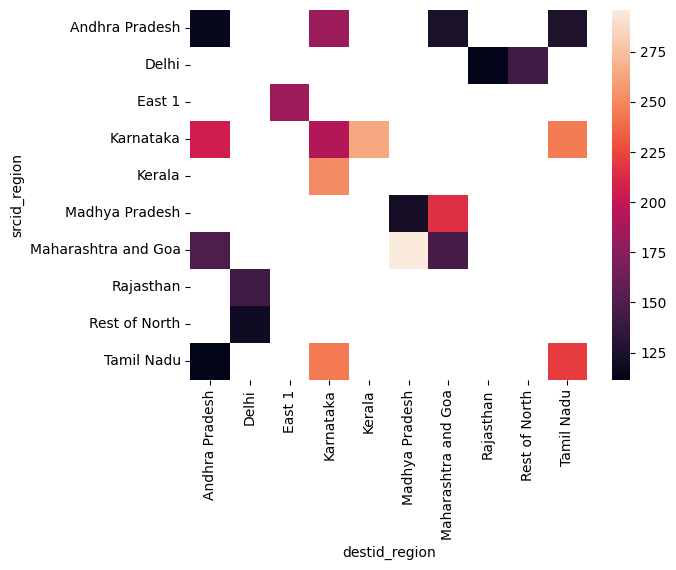

In [96]:
sns.heatmap(df.pivot_table(values='cumsum_seatcount',columns='destid_region',index='srcid_region'))

<Axes: xlabel='doj', ylabel='final_seatcount'>

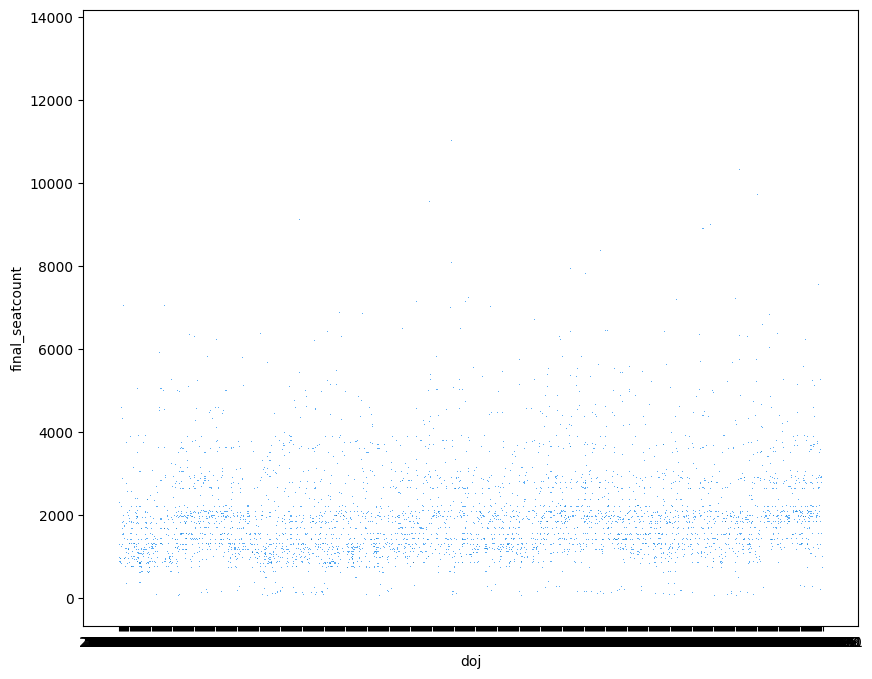

In [101]:
plt.figure(figsize=(10,8))
sns.histplot(x=train['doj'],y=train['final_seatcount'],bins=10000)

,route_key,doj,srcid,destid
4036,2025-02-16_48_45,2025-02-16,48,45
2527,2025-02-17_08_47,2025-02-17,8,47
457,2025-01-02_17_23,2025-01-02,17,23
2905,2025-02-18_02_30,2025-02-18,2,30
1763,2025-02-04_38_36,2025-02-04,38,36


In [103]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)

In [104]:
x=pca.fit_transform(df)
x

ValueError: could not convert string to float: '2023-03-01'